In [25]:
import pandas as pd
import pickle
import numpy as np
import surprise
import matplotlib.pyplot as plt

In [26]:
df = pickle.load(open('Beer_Rating_Dataset.pkl','rb'))
df.head()

,beer,brewery,rDev,rating,username,beer_id
0,Barrel Aged Lucifer's Cuvee,Latitude 42 Brewing Company,-10.4,3.52,stonedtrippin,65265
1,BBA Ye Old Battering Ram,MadTree Brewing,2.6,4.30,stonedtrippin,68664
2,Time Crystal,Cerebral Brewing,3.4,4.25,stonedtrippin,29236
3,Tin Cup,Burial Beer Co.,-4.5,3.81,stonedtrippin,25711
4,La Folie Grand Reserve: Geisha Sour Ale,New Belgium Brewing,0.0,4.31,stonedtrippin,77009


In [27]:
dg = pickle.load(open('beer_types_final.pkl','rb'))
dg.head()

,beer,type
0,Fat Tire Amber Ale,American Amber / Red Ale
1,Tröegs Nugget Nectar,American Amber / Red Ale
2,Green Flash Hop Head Red Ale,American Amber / Red Ale
3,Bell's Amber Ale,American Amber / Red Ale
4,Tröegs Hopback Amber Ale,American Amber / Red Ale


In [28]:
recur = dg.beer.value_counts().values > 1
tulips = dg.beer.value_counts()[recur].index
print len (tulips)

9727


In [29]:
# here i assign beers with the same name uniform types based on the most common type for that name
r = 1
for n in tulips:
    print (float(r)/float(9727))*100
    foam = dg[dg.beer==n].type
    dg.loc[n,'type'] = foam.value_counts().index[0]
    r += 1

0.0102806620746
0.0205613241493
0.0308419862239
0.0411226482986
0.0514033103732
0.0616839724478
0.0719646345225
0.0822452965971
0.0925259586717
0.102806620746
0.113087282821
0.123367944896
0.13364860697
0.143929269045
0.15420993112
0.164490593194
0.174771255269
0.185051917343
0.195332579418
0.205613241493
0.215893903567
0.226174565642
0.236455227717
0.246735889791
0.257016551866
0.267297213941
0.277577876015
0.28785853809
0.298139200164
0.308419862239
0.318700524314
0.328981186388
0.339261848463
0.349542510538
0.359823172612
0.370103834687
0.380384496762
0.390665158836
0.400945820911
0.411226482986
0.42150714506
0.431787807135
0.442068469209
0.452349131284
0.462629793359
0.472910455433
0.483191117508
0.493471779583
0.503752441657
0.514033103732
0.524313765807
0.534594427881
0.544875089956
0.55515575203
0.565436414105
0.57571707618
0.585997738254
0.596278400329
0.606559062404
0.616839724478
0.627120386553
0.637401048628
0.647681710702
0.657962372777
0.668243034851
0.678523696926
0.68880

KeyboardInterrupt: 

In [ ]:
dg[dg.type=='Fruit / Vegetable Beer'].beer.value_counts()

In [30]:
#pickle.dump(dg,open('beer_types_vote.pkl','wb'))
dg = pickle.load(open('beer_types_vote.pkl','rb'))

In [31]:
dg

,beer,type
0,Fat Tire Amber Ale,American Amber / Red Ale
1,Tröegs Nugget Nectar,American Amber / Red Ale
2,Green Flash Hop Head Red Ale,American Amber / Red Ale
3,Bell's Amber Ale,American Amber / Red Ale
4,Tröegs Hopback Amber Ale,American Amber / Red Ale
5,Flipside Red IPA,American Amber / Red Ale
6,Censored,American Amber / Red Ale
7,Lagunitas Lucky 13 Mondo Large Red Ale,American Amber / Red Ale
8,Great Lakes Nosferatu,American Amber / Red Ale
9,Red Rocket Ale,American Amber / Red Ale


In [32]:
dz = df.merge(dg,on='beer')

In [33]:
dz

,beer,brewery,rDev,rating,username,beer_id,type
0,BBA Ye Old Battering Ram,MadTree Brewing,2.6,4.30,stonedtrippin,68664,American Barleywine
1,BBA Ye Old Battering Ram,MadTree Brewing,-6.0,3.94,knapp85,68664,American Barleywine
2,BBA Ye Old Battering Ram,MadTree Brewing,6.4,4.46,bluejacket74,68664,American Barleywine
3,BBA Ye Old Battering Ram,MadTree Brewing,3.6,4.34,jzeilinger,68664,American Barleywine
4,BBA Ye Old Battering Ram,MadTree Brewing,-13.4,3.63,somethingclever,68664,American Barleywine
5,Time Crystal,Cerebral Brewing,3.4,4.25,stonedtrippin,29236,American IPA
6,Time Crystal,Cerebral Brewing,-6.6,3.84,bucannonxc5,29236,American IPA
7,Tin Cup,Burial Beer Co.,-4.5,3.81,stonedtrippin,25711,Milk / Sweet Stout
8,Tin Cup,Burial Beer Co.,-3.5,3.85,beerchitect,25711,Milk / Sweet Stout
9,Tin Cup,Burial Beer Co.,-1.3,3.94,metter98,25711,Milk / Sweet Stout


In [34]:
dz[dz.type.str.contains('Ale')].type.value_counts()

American Pale Ale (APA)                301991
Saison / Farmhouse Ale                 132931
English India Pale Ale (IPA)            69062
American Amber / Red Ale                67469
English Pale Ale                        52580
American Brown Ale                      45768
Pumpkin Ale                             45387
American Black Ale                      31944
American Blonde Ale                     30760
English Brown Ale                       22850
Belgian Pale Ale                        21040
Scotch Ale / Wee Heavy                  20150
American Wild Ale                       18390
American Pale Wheat Ale                 17710
Cream Ale                               13160
Irish Red Ale                           12762
Belgian Strong Dark Ale                 10723
Scottish Ale                            10002
Belgian Strong Pale Ale                  9091
American Strong Ale                      6483
Old Ale                                  4295
English Strong Ale                

In [35]:
IPA = ['American IPA','American Pale Ale (APA)','American Double / Imperial IPA','English India Pale Ale (IPA)','Belgian IPA','English Pale Ale','Belgian Pale Ale','American Black Ale']

In [36]:
#Belgian Dark Ale includes some porter/stouts
DarkAles = ['American Amber / Red Ale', 'American Brown Ale','Belgian Dark Ale','English Brown Ale',
             'Irish Red Ale','Flanders Red Ale','Altbier',u'Bière de Garde','Scottish Ale','Dubbel','Quadrupel (Quad)','Winter Warmer']

In [37]:
PorterStouts = ['American Porter','American Stout','American Double / Imperial Stout','English Porter','English Stout','Milk / Sweet Stout','Irish Dry Stout',
                'Foreign / Export Stout','Oatmeal Stout','Russian Imperial Stout','Baltic Porter']

In [38]:
Wheat = ['American Dark Wheat Ale','American Pale Wheat Ale','American Blonde Ale','Witbier','English Pale Mild Ale','English Dark Mild Ale',
        'Berliner Weissbier','Dunkelweizen','Gose',u'Kölsch','Kölsch','Hefeweizen','Kristalweizen','Weizenbock']

In [39]:
Strong = ['American Barleywine','Wheatwine','English Strong Ale','English Barleywine','Braggot','Belgian Strong Dark Ale',
          'Belgian Strong Pale Ale','American Strong Ale','Euro Strong Lager','American Malt Liquor','Scotch Ale / Wee Heavy',
         u'Bière de Champagne / Bière Bru','Tripel',u'Bière de Champagne / Bière Brut','Old Ale']

In [40]:
LightLager = ['American Adjunct Lager','American Double / Imperial Pilsner','Light Lager','Czech Pilsener',
             'Euro Pale Lager','Dortmunder / Export Lager','German Pilsener','Kellerbier / Zwickelbier','Munich Helles Lager',
             'Happoshu','Japanese Rice Lager']

In [41]:
DarkLager = ['Bock','Doppelbock','Eisbock','California Common / Steam Beer','American Amber / Red Lager','American Pale Lager',
            'Euro Dark Lager','Maibock / Helles Bock', u'Märzen / Oktoberfest','Munich Dunkel Lager','Rauchbier','Schwarzbier',
             'Vienna Lager']

In [42]:
Fruity = ['Fruit / Vegetable Beer','Herbed / Spiced Beer','Smoked Beer','American Wild Ale','Lambic - Fruit',
        'Saison / Farmhouse Ale','Cream Ale','Pumpkin Ale','Chile Beer','English Bitter','Extra Special / Strong Bitter (ESB)',
          'Kvass','Scottish Gruit / Ancient Herbed Ale','Faro','Flanders Oud Bruin','Gueuze','Lambic - Unblended','Black & Tan',
         'Roggenbier','Sahti']

In [43]:
for x in IPA:
    dz.loc[dz.type==x,'group'] = 'IPA/PA'

In [44]:
for x in DarkAles:
    dz.loc[dz.type==x,'group'] = 'Dark Ale'

In [45]:
for x in PorterStouts:
    dz.loc[dz.type==x,'group'] = 'Porter/Stout'

In [46]:
for x in Wheat:
    dz.loc[dz.type==x,'group'] = 'Wheat'

C:\Users\zhutk\Anaconda2\lib\site-packages\pandas\core\ops.py:745: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  result = lib.scalar_compare(x, y, op)


In [47]:
for x in Strong:
    dz.loc[dz.type==x,'group'] = 'High ABV'

In [48]:
for x in DarkLager:
    dz.loc[dz.type==x,'group'] = 'Dark Lager'

In [49]:
for x in LightLager:
    dz.loc[dz.type==x,'group'] = 'Pale Lager'

In [50]:
for x in Fruity:
    dz.loc[dz.type==x,'group'] = 'Fruity/Flavored'

In [51]:
dz.loc[dz.type=='Low Alcohol Beer','group'] = 'Non-Alcoholic'

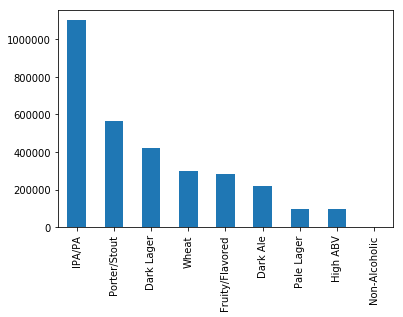

In [52]:
dz.group.value_counts().plot(kind='bar')
plt.show()

In [53]:
dz

,beer,brewery,rDev,rating,username,beer_id,type,group
0,BBA Ye Old Battering Ram,MadTree Brewing,2.6,4.30,stonedtrippin,68664,American Barleywine,High ABV
1,BBA Ye Old Battering Ram,MadTree Brewing,-6.0,3.94,knapp85,68664,American Barleywine,High ABV
2,BBA Ye Old Battering Ram,MadTree Brewing,6.4,4.46,bluejacket74,68664,American Barleywine,High ABV
3,BBA Ye Old Battering Ram,MadTree Brewing,3.6,4.34,jzeilinger,68664,American Barleywine,High ABV
4,BBA Ye Old Battering Ram,MadTree Brewing,-13.4,3.63,somethingclever,68664,American Barleywine,High ABV
5,Time Crystal,Cerebral Brewing,3.4,4.25,stonedtrippin,29236,American IPA,IPA/PA
6,Time Crystal,Cerebral Brewing,-6.6,3.84,bucannonxc5,29236,American IPA,IPA/PA
7,Tin Cup,Burial Beer Co.,-4.5,3.81,stonedtrippin,25711,Milk / Sweet Stout,Porter/Stout
8,Tin Cup,Burial Beer Co.,-3.5,3.85,beerchitect,25711,Milk / Sweet Stout,Porter/Stout
9,Tin Cup,Burial Beer Co.,-1.3,3.94,metter98,25711,Milk / Sweet Stout,Porter/Stout


In [54]:
dz.loc[dz.beer.str.contains('IPA')&dz.group.isnull(),'group'] = 'IPA/PA'
dz.loc[dz.beer.str.contains('Pale')&dz.group.isnull(),'group'] = 'IPA/PA'
dz.loc[dz.beer == 'Ryeday The 13th','group'] = 'High ABV'
dz.loc[(dz.type == 'Rye Beer')&dz.group.isnull(),'group'] = 'Fruity/Flavored'

AttributeError: 'DataFrame' object has no attribute 'isnone'

In [56]:
import sys
from sklearn.externals import joblib
sys.setrecursionlimit(10000)
#pickle.dump(dz, open("Beer.pkl","wb"))
#joblib.dump(dz,'Beer_Data.pkl')

AttributeError: 'NoneType' object has no attribute 'picklable'

In [68]:
dz.to_csv('Beer',encoding = 'utf-8',index=False)

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import evaluate
from surprise import Reader
from surprise import GridSearch
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline as KNNB
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

In [ ]:
reader = Reader(rating_scale=(1, 5))
jaja = Dataset.load_from_df(df[['username','beer_id','rating']], reader)
jaja.split(n_folds=2)
algo = SVD(n_epochs=10, lr_all=.005, reg_all=.3)
algoKNN = KNNBasic()
algoKNNWM = KNNWithMeans()
algoKNNWZS = KNNWithZScore()
algoKNNB = KNNB()
algoSVDpp = SVDpp()
algoNMF = NMF()
algoSO = SlopeOne()
algoCC = CoClustering()

In [ ]:
perf = evaluate(algo, jaja, measures=['RMSE', 'MAE'])
perf1 = evaluate(algoKNNB, jaja)

In [ ]:
trainset = jaja.build_full_trainset()

In [ ]:
algoSVDpp.train(trainset)

In [ ]:
#testset = trainset.build_anti_testset()
testset = trainset.build_testset()

In [ ]:
predictions = algoKNNB.test(testset)

In [ ]:
#pickle.dump(predictions, open('beer_predictions.pkl','wb'))

In [ ]:
from collections import defaultdict

In [ ]:
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

In [ ]:
def Sort_Beers(user, beer_list):
    ok = [[x,algoKNNB.predict(user, x)[3]] for x in beer_list]
    okee = pd.DataFrame(ok,columns=['beer_id','rating'])
    do = okee.groupby('beer_id').mean().sort_values('rating',ascending=False).index
    return [df[df.beer_id == x].beer.values[0] for x in do]

In [ ]:
trial = [64591,76970,37353,3554,113385]
trial1 = [64591,113385]

In [ ]:
shit = df[df.brewery.str.contains('Big Sky')].beer_id.values
[Sort_Beers(x, trial1) for x in set(df.username)]

In [ ]:
beer_list = df[df.brewery.str.contains('SLO Brewing Company')].beer_id.values
ok = [[x,algoKNNB.predict('amber', x)[3]] for x in beer_list]
okee = pd.DataFrame(ok,columns=['beer_id','rating'])
do = okee.groupby('beer_id').mean().sort_values('rating',ascending=False).index
do

In [ ]:
[df[df.beer_id == x].beer.values[0] for x in do]

In [ ]:
def add_rating():
    length = len(df)
    user = raw_input('Username')
    brewery = raw_input('Brewery')
    beer = raw_input('Beer')
    rating = raw_input('Rating (1-5)')
    df.loc[length,'username'] = user
    df.loc[length,'brewery'] = brewery
    df.loc[length,'beer'] = beer
    df.loc[length,'rating'] = rating

In [ ]:
add_rating()

In [ ]:
algoKNNB.predict('amber', 4601)
#df[df.beer_id==8579].rating.mean()

In [ ]:
df[df.beer.str.contains('Red')].groupby('username').mean().sort_values('rDev',ascending=False)
#df[df.username==)&df.beer.str.contains('Nugget')]

In [ ]:
df.groupby('beer').sort_values('beer',ascending=False)

list of predetermined top beers. find rated, controversial beers

In [ ]:
df[df.beer.str.contains('Modelo')]

In [ ]:
#start out by rating these beers`
#Blue Moon, Negra Modelo, Corona, Guiness, Lagunitas IPA/Brown Shugga', Fat Tire, Newcastle, PBR, Budweiser, Full Sail, Arrogant Bastard, Sculpin IPA, Sierra Nevada Torpedo IPA, 

In [ ]:
def StartProfile():
    ratings = []
    beers = ['Blue Moon Belgian White','Negra Modelo','Corona Extra','Guinness Draught','Brown Shugga\'','Fat Tire Amber Ale','Newcastle Brown Ale','Budweiser','Arrogant Bastard','Sculpin IPA']
    brewery = ['Coors Brewing Company','Grupo Modelo S.A. de C.V.','Grupo Modelo S.A. de C.V.','Guinnness Ltd.','Lagunitas Brewing Company','New Belgium Brewing','Heineken Nederland B.V.','Anheuser_Busch','Arrogant Brewing','Ballast Point Brewing Company']
    beer_id = [33753,52675,52662,52740,64504,76970,55151,5746,6533,8579]
    beer_id = [int(x) for x in beer_id]
    user = raw_input('Please enter your username:')
    print 'Please rate the following beers (1-5).  If you have not tried a beer, respond with 0'
    ratings.append(float(raw_input('Blue Moon')))
    ratings.append(float(raw_input('Negra Modelo')))
    ratings.append(float(raw_input('Corona Extra')))
    ratings.append(float(raw_input('Guinness Draught')))
    ratings.append(float(raw_input('Lagunitas Brown Shugga\'')))
    ratings.append(float(raw_input('Fat Tire Amber Ale')))
    ratings.append(float(raw_input('Newcastle Brown Ale')))
    ratings.append(float(raw_input('Budweiser')))
    ratings.append(float(raw_input('Arrogant Bastard Ale')))
    ratings.append(float(raw_input('Sculpin IPA')))
    
    length = len(df)
    for n in range(len(ratings)):
        avg = df[df.beer_id==beer_id[n]].mean()[1]
        length += 1
        # Users are assigned the average rating if they have not tried a beer.
        if ratings[n] == 0:
            df.loc[length,'username'] = user
            df.loc[length,'brewery'] = brewery[n]
            df.loc[length,'beer'] = beers[n]
            df.loc[length,'rating'] = avg
            df.loc[length,'beer_id'] = beer_id[n]
            df.loc[length,'rDev'] = 0
        else:
            df.loc[length,'username'] = user
            df.loc[length,'brewery'] = brewery[n]
            df.loc[length,'beer'] = beers[n]
            df.loc[length,'rating'] = ratings[n]
            df.loc[length,'beer_id'] = beer_id[n]
            df.loc[length,'rDev'] = ((ratings[n]-avg)/avg)*100

In [ ]:
StartProfile()
#[type(f) for f in df[df.beer_id==33753].rating.values]
#r = df[df.beer_id==33753].rating.values
#df[df.beer_id==33753].mean()[1]

In [ ]:
df[df.username=='ipa']

In [ ]:
df[df.beer.str.contains('Budweiser')]

In [ ]:
High_std = df.groupby('beer_id').std().sort_values('rating',ascending=False).index[0:20000]
High_count = df.groupby('beer_id').count().sort_values('rating',ascending=False).index[0:50]
a = set(High_std); b = set(High_count)
a.intersection(b)